In [109]:
# !jt -t chesterish  # set given theme
#!jt -r # reset default theme

Reset css and font defaults in:
/home/bambusito/.jupyter/custom &
/home/bambusito/.local/share/jupyter/nbextensions


# Southern Women Dataset
## Hierarchical clustering and polarisation evaluation in bimodal networks
### Adrián Fernández Cid

## Outline
### 1. Data and bimodal network
### 2. Hierarchical, agglomerative clustering


## 1. Data and bimodal network

The Southern Women dataset is a bimodal network of 18 women linked to 14 different social events only if they attended the given event. It is a popular dataset for testing clustering methods in bimodal networks, as there are two distinct communities of women, each favoring one of two classes of social event.

Data from http://casos.cs.cmu.edu/computational_tools/datasets/external/davis/index2.html.

Original study:

A more recent reappraisal:

Let us load and check the data;

In [1]:
import xml.etree.ElementTree as ET
tree = ET.parse('../data/SouthernWomen.xml')
root = tree.getroot()

In [2]:
#recursively check all (*) elements in tree and print 
#their tag and atribute
for element in root.iter('*'): 
    print(element.tag, element.attrib)

DynamicMetaNetwork {'id': 'davis'}
MetaNetwork {'id': 'davis'}
nodes {}
nodeclass {'type': 'Agent', 'id': 'agent'}
node {'id': 'EVELYN'}
node {'id': 'LAURA'}
node {'id': 'THERESA'}
node {'id': 'BRENDA'}
node {'id': 'CHARLOTTE'}
node {'id': 'FRANCES'}
node {'id': 'ELEANOR'}
node {'id': 'PEARL'}
node {'id': 'RUTH'}
node {'id': 'VERNE'}
node {'id': 'MYRNA'}
node {'id': 'KATHERINE'}
node {'id': 'SYLVIA'}
node {'id': 'NORA'}
node {'id': 'HELEN'}
node {'id': 'DOROTHY'}
node {'id': 'OLIVIA'}
node {'id': 'FLORA'}
nodeclass {'type': 'Event', 'id': 'event'}
node {'id': 'E1'}
node {'id': 'E2'}
node {'id': 'E3'}
node {'id': 'E4'}
node {'id': 'E5'}
node {'id': 'E6'}
node {'id': 'E7'}
node {'id': 'E8'}
node {'id': 'E9'}
node {'id': 'E10'}
node {'id': 'E11'}
node {'id': 'E12'}
node {'id': 'E13'}
node {'id': 'E14'}
networks {}
network {'sourceType': 'Agent', 'source': 'agent', 'targetType': 'Event', 'target': 'event', 'id': 'agent x event'}
link {'source': 'EVELYN', 'target': 'E1'}
link {'source': 'EV

Recover nodes (women and events):

In [3]:
nodes = []
for node in root.iter('node'): 
    nodes.append(node.attrib["id"])

In [4]:
print(nodes)
women = nodes[:18]
events = nodes[18:]

['EVELYN', 'LAURA', 'THERESA', 'BRENDA', 'CHARLOTTE', 'FRANCES', 'ELEANOR', 'PEARL', 'RUTH', 'VERNE', 'MYRNA', 'KATHERINE', 'SYLVIA', 'NORA', 'HELEN', 'DOROTHY', 'OLIVIA', 'FLORA', 'E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14']


Women-events network:

In [5]:
import networkx as nx

B = nx.Graph()
# Add nodes with the node attribute "bipartite"
B.add_nodes_from(events, bipartite=0)
B.add_nodes_from(women, bipartite=1)

#add edges
for link in root.iter('link'): 
    source = link.attrib["source"]
    target = link.attrib["target"]
    B.add_edge(source, target)

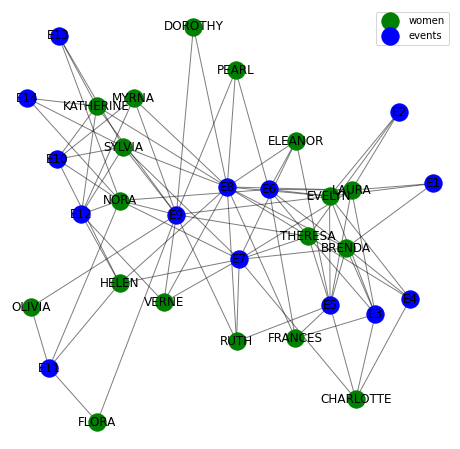

In [6]:
import matplotlib.pyplot as plt

pos = nx.fruchterman_reingold_layout(B);
plt.figure(figsize=(8,8));
plt.axis("off");
nx.draw_networkx_nodes(women, pos, node_size=300, node_color="green", label="women");
nx.draw_networkx_nodes(events, pos, node_size=300, node_color="blue", label="events");
nx.draw_networkx_edges(B, pos, alpha=0.500);
#scatterpoints is the number of points of each colour in legend
nx.draw_networkx_labels(B, pos, font_color="black");
plt.legend(scatterpoints = 1) 
plt.show()

## 2. Hierarchical, agglomerative clustering

Define a dictionary containing all events each of the women attended:

In [7]:
woman2event = {w:[] for w in women}
for link in root.iter('link'): 
    source = link.attrib["source"]
    target = link.attrib["target"]
    woman2event[source].append(target)
woman2event

{'EVELYN': ['E1', 'E2', 'E3', 'E4', 'E5', 'E6', 'E8', 'E9'],
 'LAURA': ['E1', 'E2', 'E3', 'E5', 'E6', 'E7', 'E8'],
 'THERESA': ['E2', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9'],
 'BRENDA': ['E1', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8'],
 'CHARLOTTE': ['E3', 'E4', 'E5', 'E7'],
 'FRANCES': ['E3', 'E5', 'E6', 'E8'],
 'ELEANOR': ['E5', 'E6', 'E7', 'E8'],
 'PEARL': ['E6', 'E8', 'E9'],
 'RUTH': ['E5', 'E7', 'E8', 'E9'],
 'VERNE': ['E7', 'E8', 'E9', 'E12'],
 'MYRNA': ['E8', 'E9', 'E10', 'E12'],
 'KATHERINE': ['E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 'SYLVIA': ['E7', 'E8', 'E9', 'E10', 'E12', 'E13', 'E14'],
 'NORA': ['E6', 'E7', 'E9', 'E10', 'E11', 'E12', 'E13', 'E14'],
 'HELEN': ['E7', 'E8', 'E10', 'E11', 'E12'],
 'DOROTHY': ['E8', 'E9'],
 'OLIVIA': ['E9', 'E11'],
 'FLORA': ['E9', 'E11']}

Define a dictionary containing a binary feature vector per woman, the vector corresponding to the attendance value (yes:1, no:0) of the woman to the corresponding event. Although we could also project the network on events rather than on women, from a conceptual (social) perspective it is more interesting to do it for women (even if the two communities are there in either case).

In [8]:
import numpy as np

n_events = len(events)
woman2vect = {w:[0]*n_events for w in women}
for w in women:
    for i, e in enumerate(events):
        if e in woman2event[w]:
            woman2vect[w][i] = 1
woman2vect

{'EVELYN': [1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 'LAURA': [1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 'THERESA': [0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0],
 'BRENDA': [1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 'CHARLOTTE': [0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
 'FRANCES': [0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0],
 'ELEANOR': [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0],
 'PEARL': [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0],
 'RUTH': [0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0],
 'VERNE': [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
 'MYRNA': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0],
 'KATHERINE': [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 'SYLVIA': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1],
 'NORA': [0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1],
 'HELEN': [0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0],
 'DOROTHY': [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
 'OLIVIA': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
 'FLORA': [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]}

We now define the distance matrix between nodes (events). To do so, we consider their pairwise phi-correlation (using the previously defined dictionary **woman2vect**), which we later turn into an Euclidean distance.

In [9]:
from sklearn.metrics import matthews_corrcoef

#build condensed distance matrix
phi = []
n_women = len(women)
for i, wi in enumerate(women):
    vec_wi = woman2vect[wi]
    for j in range(i+1, n_women):
        vec_wj = woman2vect[women[j]]  
        phi.append(matthews_corrcoef(vec_wi, vec_wj))
        #to check correlations are actually symmetric
        #print(matthews_corrcoef(vec_wi, vec_wj)
        #      , matthews_corrcoef(vec_wj,vec_wi))
        
#the expected length is n(n-1)/2
print(len(phi), n_women*(n_women-1)/2)
#turn correlations to Euclidean distances (the phi are somewhat like the cosine)
d = np.sqrt(2*(1-np.array(phi)))
d /= max(d)

dfile = "../data/d_SouthernWomen.npy"
np.save(dfile, d)

d.shape

153 153.0


(153,)

We are now ready to apply hierarchical clustering. The scipy method gives:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dfile = "../data/d_SouthernWomen.npy"
d = np.load(dfile)

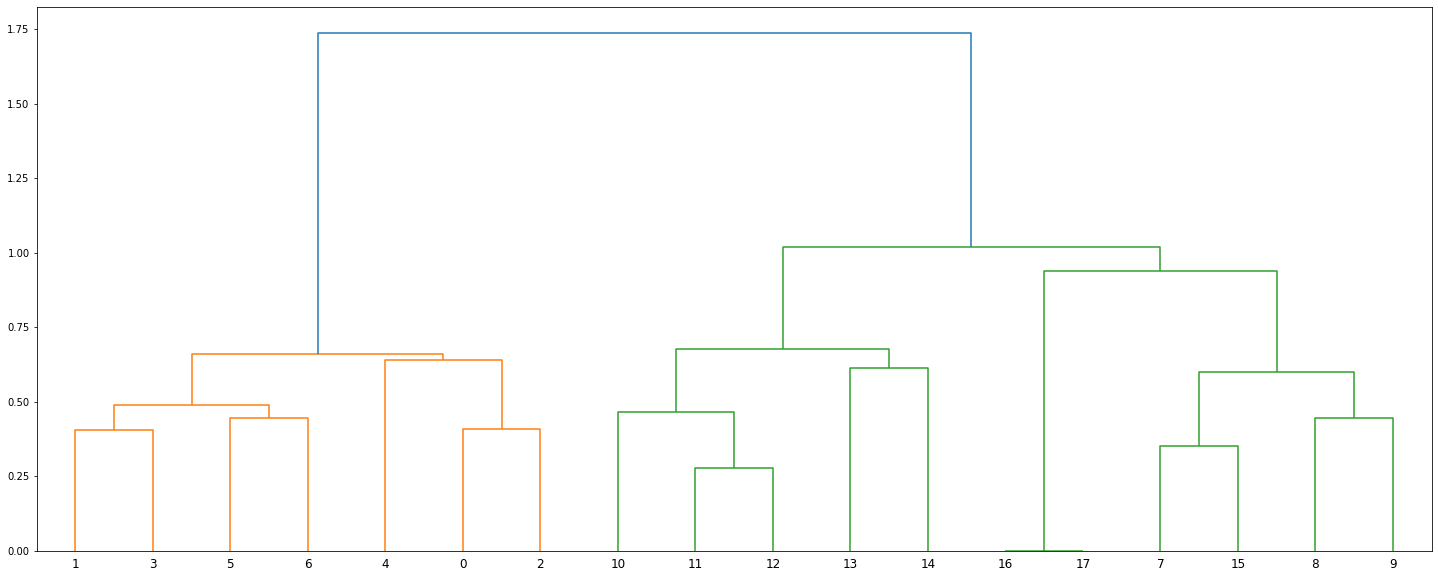

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

z_sc = linkage(d, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(z_sc)
plt.show()

In [12]:
z_sc

array([[16.        , 17.        ,  0.        ,  2.        ],
       [11.        , 12.        ,  0.2766892 ,  2.        ],
       [ 7.        , 15.        ,  0.35316046,  2.        ],
       [ 1.        ,  3.        ,  0.40406102,  2.        ],
       [ 0.        ,  2.        ,  0.40824829,  2.        ],
       [ 5.        ,  6.        ,  0.4472136 ,  2.        ],
       [ 8.        ,  9.        ,  0.4472136 ,  2.        ],
       [10.        , 19.        ,  0.46609234,  3.        ],
       [21.        , 23.        ,  0.48828083,  4.        ],
       [20.        , 24.        ,  0.59999298,  4.        ],
       [13.        , 14.        ,  0.61213202,  2.        ],
       [ 4.        , 22.        ,  0.64090007,  3.        ],
       [26.        , 29.        ,  0.66025877,  7.        ],
       [25.        , 28.        ,  0.67855153,  5.        ],
       [18.        , 27.        ,  0.9386196 ,  6.        ],
       [31.        , 32.        ,  1.01900634, 11.        ],
       [30.        , 33.

The above plot looks ok, but we can make it even more informative by coupling it to a heatmap of the distance matrix:

In [15]:
from scipy.spatial.distance import squareform
import pandas as pd

d_sq = squareform(d)
df = pd.DataFrame(d_sq, index=women, columns=women)
df.head()

,EVELYN,LAURA,THERESA,BRENDA,CHARLOTTE,FRANCES,ELEANOR,PEARL,RUTH,VERNE,MYRNA,KATHERINE,SYLVIA,NORA,HELEN,DOROTHY,OLIVIA,FLORA
EVELYN,0.000000,0.491441,0.408248,0.491441,0.664092,0.508374,0.664092,0.559455,0.664092,0.789679,0.789679,0.899735,0.949391,1.000000,0.943983,0.607781,0.777882,0.777882
LAURA,0.491441,0.000000,0.491441,0.404061,0.625082,0.458285,0.458285,0.686990,0.625082,0.755929,0.867254,0.949391,0.903508,0.949391,0.810316,0.755929,0.897058,0.897058
THERESA,0.408248,0.491441,0.000000,0.491441,0.508374,0.508374,0.508374,0.559455,0.508374,0.664092,0.789679,0.899735,0.858129,0.912871,0.847921,0.607781,0.777882,0.777882
BRENDA,0.491441,0.404061,0.491441,0.000000,0.458285,0.458285,0.458285,0.686990,0.625082,0.755929,0.867254,0.949391,0.903508,0.949391,0.810316,0.755929,0.897058,0.897058
CHARLOTTE,0.664092,0.625082,0.508374,0.458285,0.000000,0.632456,0.632456,0.871875,0.632456,0.774597,0.894427,0.940432,0.867254,0.897868,0.807614,0.847921,0.847921,0.847921


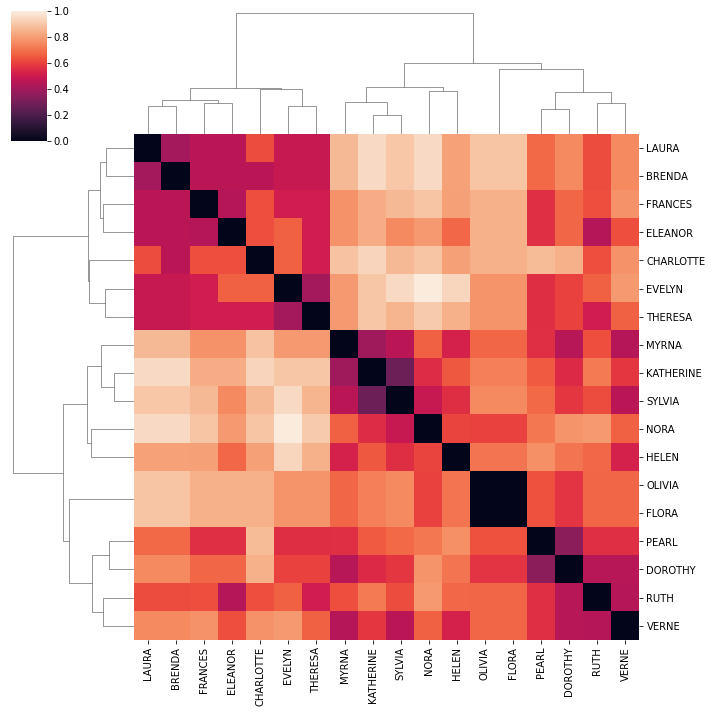

In [18]:
import seaborn as sns

sns.clustermap(df, row_linkage=z_sc, col_linkage=z_sc)
plt.show()

Better!

Let's see what our method gives with Ward clustering:

In [19]:
#for importing from parent directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

Iteration 15/16...
Cluster 6 (size 7) and cluster 14 (size 5) have dist 1.75
Cluster 6 (size 7) and cluster 17 (size 6) have dist 1.38
Cluster 14 (size 5) and cluster 17 (size 6) have dist 1.02
and total polarisation is 0.26
Iteration 16/16...
Cluster 6 (size 7) and cluster 17 (size 11) have dist 1.74
and total polarisation is 0.28


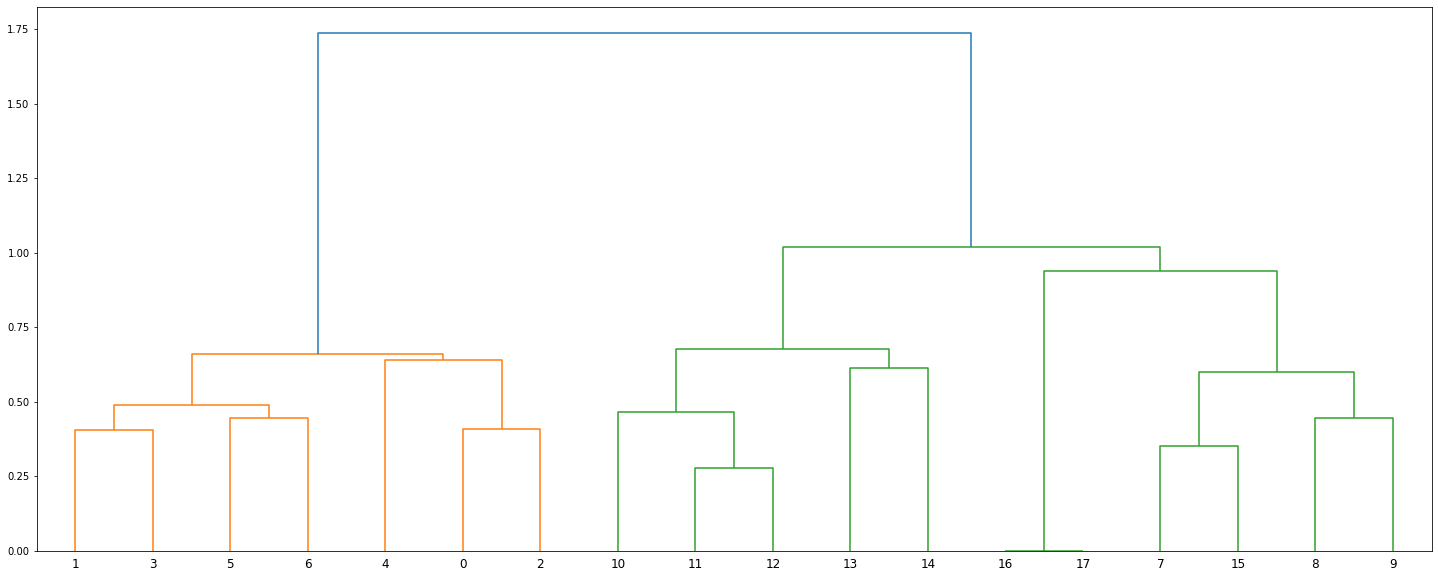

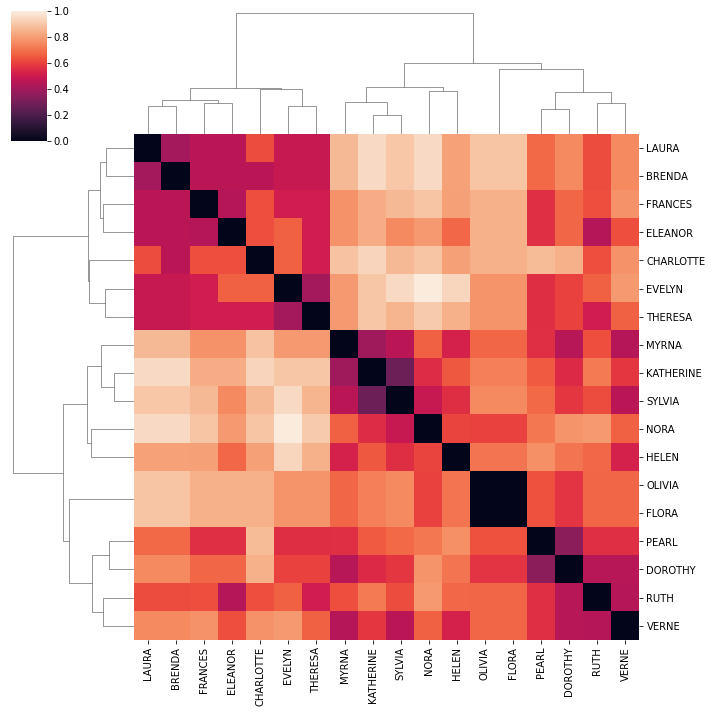

In [52]:
from scipy.cluster.hierarchy import dendrogram
from utils.clustering import agglomerative_clustering

z_wrd, pol_wrd = agglomerative_clustering(d, method='ward',
                                    verbose=1, algorithm="nn_chain")

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(z_wrd)
plt.show()
sns.clustermap(df, row_linkage=z_wrd, col_linkage=z_wrd)
plt.savefig("../plots/SouthernWomen_dendogram_ward.png")
plt.show()

In [22]:
z_wrd, np.round(pol_wrd, 2)

(array([[16.        , 17.        ,  0.        ,  2.        ],
        [11.        , 12.        ,  0.2766892 ,  2.        ],
        [ 7.        , 15.        ,  0.35316046,  2.        ],
        [ 1.        ,  3.        ,  0.40406102,  2.        ],
        [ 0.        ,  2.        ,  0.40824829,  2.        ],
        [ 5.        ,  6.        ,  0.4472136 ,  2.        ],
        [ 8.        ,  9.        ,  0.4472136 ,  2.        ],
        [10.        , 19.        ,  0.46609234,  3.        ],
        [21.        , 23.        ,  0.48828083,  4.        ],
        [20.        , 24.        ,  0.59999298,  4.        ],
        [13.        , 14.        ,  0.61213202,  2.        ],
        [ 4.        , 22.        ,  0.64090007,  3.        ],
        [26.        , 29.        ,  0.66025877,  7.        ],
        [25.        , 28.        ,  0.67855153,  5.        ],
        [18.        , 27.        ,  0.9386196 ,  6.        ],
        [31.        , 32.        ,  1.01900634, 11.        ],
        

The dendograms look the same, and the linkage matrices are indeed identical:

In [23]:
np.isclose(z_wrd,z_sc).all()

True

(17,)


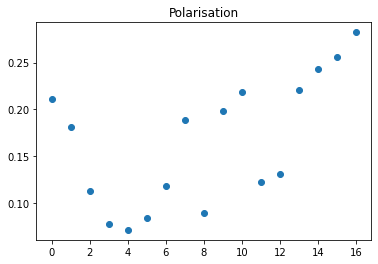

In [25]:
from matplotlib import pyplot as plt

print(pol_wrd.shape)
plt.plot(pol_wrd, "o")
plt.title("Polarisation")
plt.show()

Great! Both methods show the expected division in two communities, and our adaptation of the scipy method is validated. 

Let's now check for the centroid method.

The scipy method for centroid dist gives:

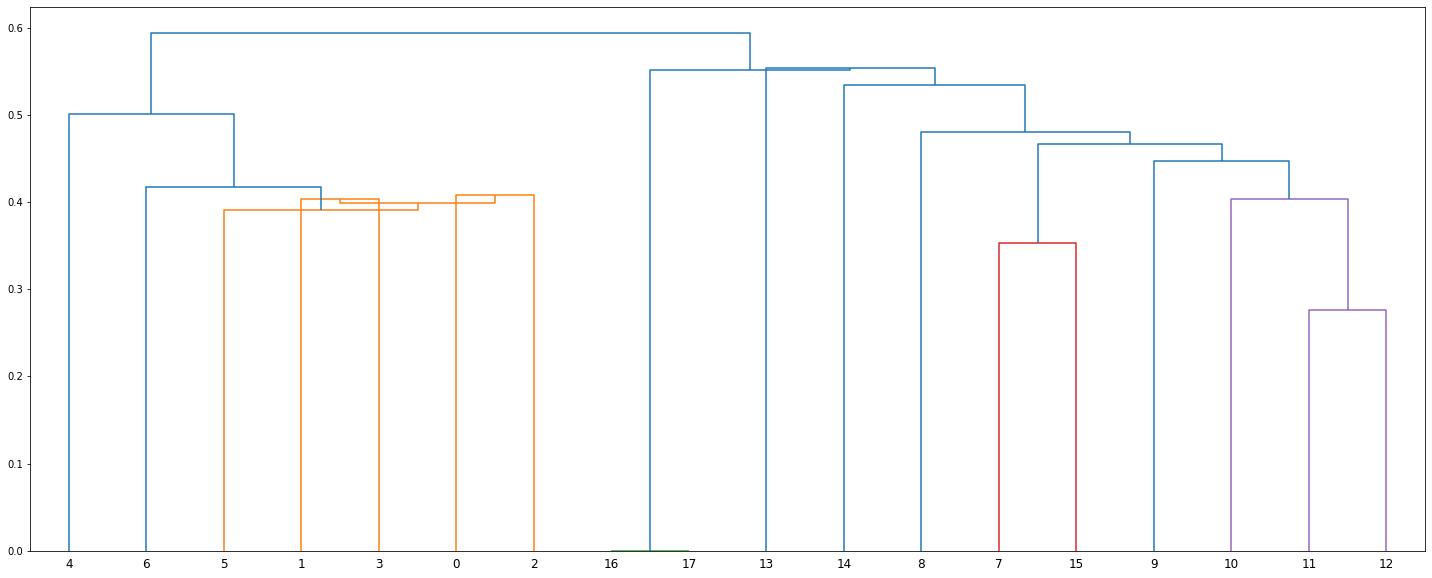

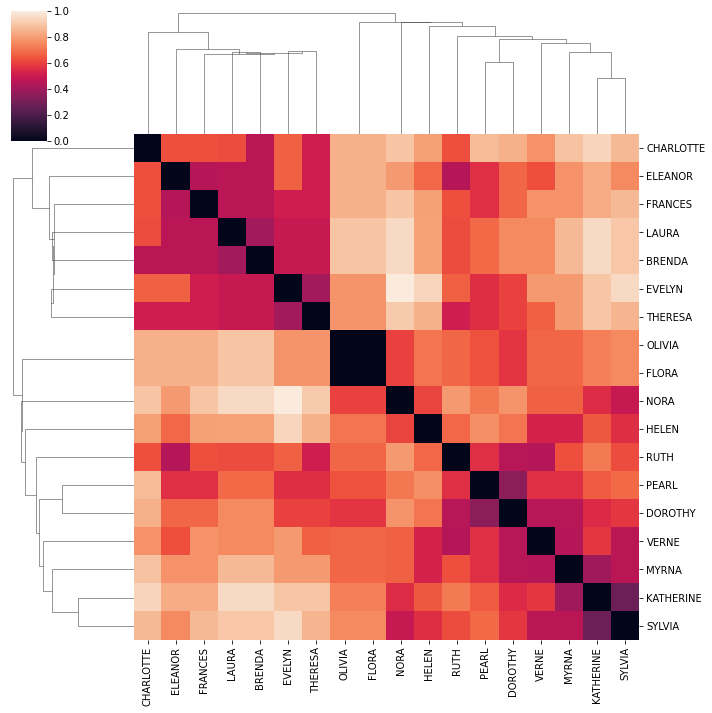

In [29]:
from scipy.cluster.hierarchy import dendrogram, linkage

z_sc = linkage(d, 'centroid')

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(z_sc)
plt.show()
sns.clustermap(df, row_linkage=z_sc, col_linkage=z_sc)
plt.show()

While ours gives:

Iteration 15/16...
Cluster 6 (size 7) and cluster 15 (size 9) have dist 0.59
Cluster 6 (size 7) and cluster 17 (size 2) have dist 0.77
Cluster 15 (size 9) and cluster 17 (size 2) have dist 0.55
and total polarisation is 0.28
Iteration 16/16...
Cluster 6 (size 7) and cluster 17 (size 11) have dist 0.59
and total polarisation is 0.28


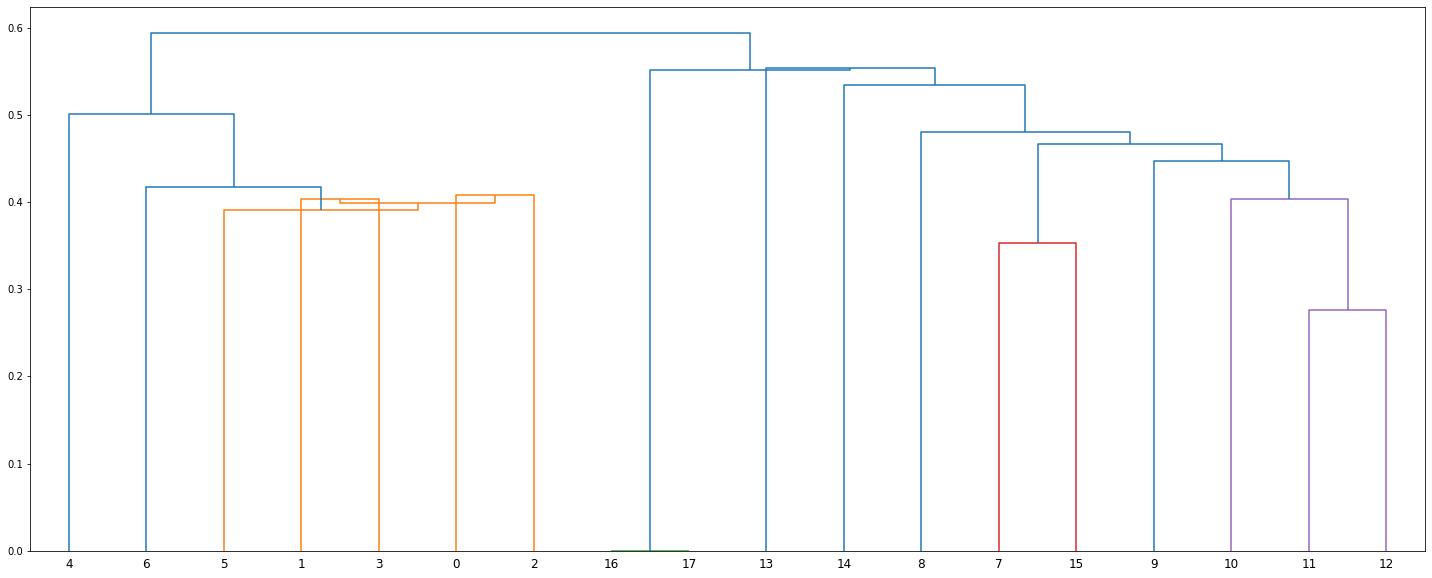

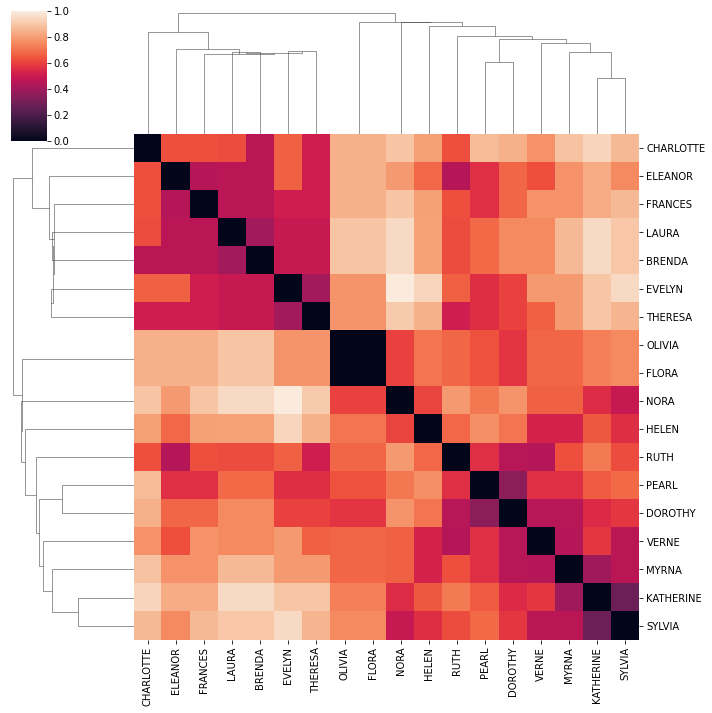

In [53]:
from scipy.cluster.hierarchy import dendrogram
from utils.clustering import agglomerative_clustering

z_ctr, pol_ctr = agglomerative_clustering(d, method='centroid'
                                      , alpha=1, K=None
                                     , verbose=1, algorithm="generic")

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(z_ctr)
plt.show()
sns.clustermap(df, row_linkage=z_ctr, col_linkage=z_ctr)
plt.savefig("../plots/SouthernWomen_dendogram_centroid.png")
plt.show()

In [31]:
#have to change np print option by activating suppression;
#otherwise everything appears in lengthy scientific notation due to large distance (819)
np.set_printoptions(suppress=True)

z_ctr, np.round(pol_ctr, 2)

(array([[16.        , 17.        ,  0.        ,  2.        ],
        [11.        , 12.        ,  0.2766892 ,  2.        ],
        [ 7.        , 15.        ,  0.35316046,  2.        ],
        [10.        , 19.        ,  0.4036478 ,  3.        ],
        [ 1.        ,  3.        ,  0.40406102,  2.        ],
        [ 0.        ,  2.        ,  0.40824829,  2.        ],
        [22.        , 23.        ,  0.39878708,  4.        ],
        [ 5.        , 24.        ,  0.39145313,  5.        ],
        [ 6.        , 25.        ,  0.4178344 ,  6.        ],
        [ 9.        , 21.        ,  0.44714511,  4.        ],
        [20.        , 27.        ,  0.4665779 ,  6.        ],
        [ 8.        , 28.        ,  0.48008152,  7.        ],
        [ 4.        , 26.        ,  0.50135509,  7.        ],
        [14.        , 29.        ,  0.53382498,  8.        ],
        [13.        , 31.        ,  0.55386097,  9.        ],
        [18.        , 32.        ,  0.55136661, 11.        ],
        

In [32]:
np.isclose(z_ctr,z_sc).all()

True

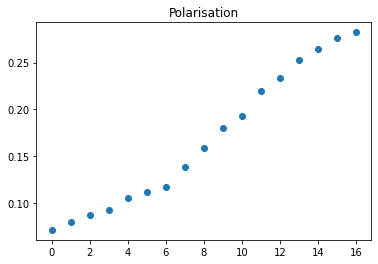

In [33]:
from matplotlib import pyplot as plt
#print(pol.shape)
plt.plot(pol_ctr, "o")
plt.title("Polarisation")
plt.show()

Note that our method gives error if one tries to use the *nn_chain* algorithm with the *centroid* method:

In [34]:
z_ctr, pol_ctr = agglomerative_clustering(d, method='centroid'
                                      , alpha=1, K=None
                                     , verbose=1, algorithm="nn_chain")

ValueError: The nn_chain algorithm cannot be used with the centroid method. Use algorithm='generic' instead.

Let's now see what we get when using the polarisation distance, i.e.

$$d_{u,v} = d^c_{u,v}( \pi_u^{1+\alpha}\pi_v + \pi_v^{1+\alpha}\pi_u)$$

where $\alpha \in (0,1.6]$, $\pi_i$ is the size of cluster $i$ and $d^c_{u,v}$ is the centroid distance between $u$ and $v$, as the clustering criterion:

Iteration 15/16...
Cluster 6 (size 6) and cluster 15 (size 8) have dist 196.38
Cluster 6 (size 6) and cluster 17 (size 4) have dist 72.82
Cluster 15 (size 8) and cluster 17 (size 4) have dist 84.77
and total polarisation is 0.12
Iteration 16/16...
Cluster 15 (size 8) and cluster 17 (size 10) have dist 317.58
and total polarisation is 0.11


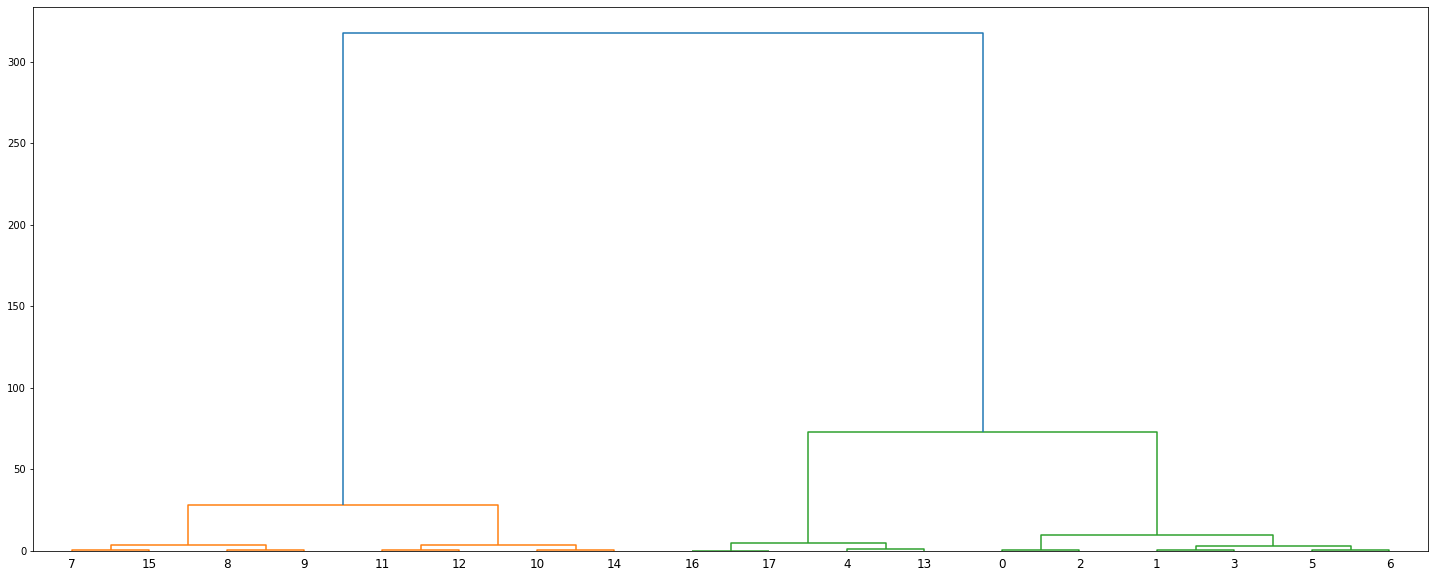

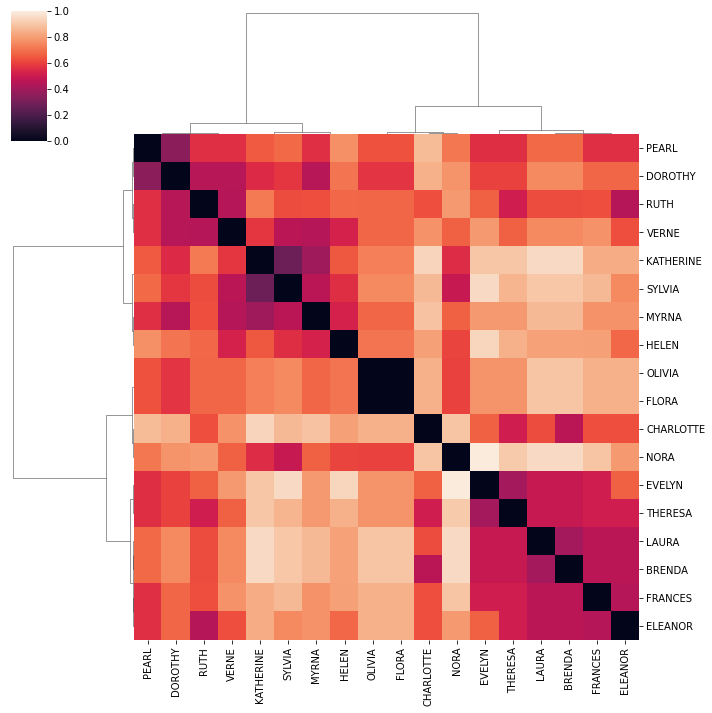

In [54]:
from scipy.cluster.hierarchy import dendrogram
from utils.clustering import agglomerative_clustering

z_pld, pol_pld = agglomerative_clustering(d, method='poldist'
                                      , alpha=1, K=None, verbose=1
                                     , algorithm="nn_chain")

fig = plt.figure(figsize=(25, 10))
dn = dendrogram(z_pld)
plt.show()
sns.clustermap(df, row_linkage=z_pld, col_linkage=z_pld)
plt.savefig("../plots/SouthernWomen_dendogram_poldist.png")

plt.show()

(17,)


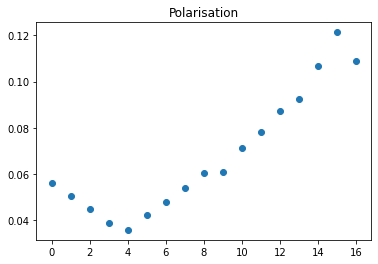

In [36]:
from matplotlib import pyplot as plt
print(pol_pld.shape)
plt.plot(pol_pld, "o")
plt.title("Polarisation")
plt.show()

And using the *generic_clustering* algorithm: 

Iteration 15/16...
Cluster 6 (size 6) and cluster 15 (size 8) have dist 196.38
Cluster 6 (size 6) and cluster 17 (size 4) have dist 72.82
Cluster 15 (size 8) and cluster 17 (size 4) have dist 84.77
and total polarisation is 0.12
Iteration 16/16...
Cluster 15 (size 8) and cluster 17 (size 10) have dist 317.58
and total polarisation is 0.11


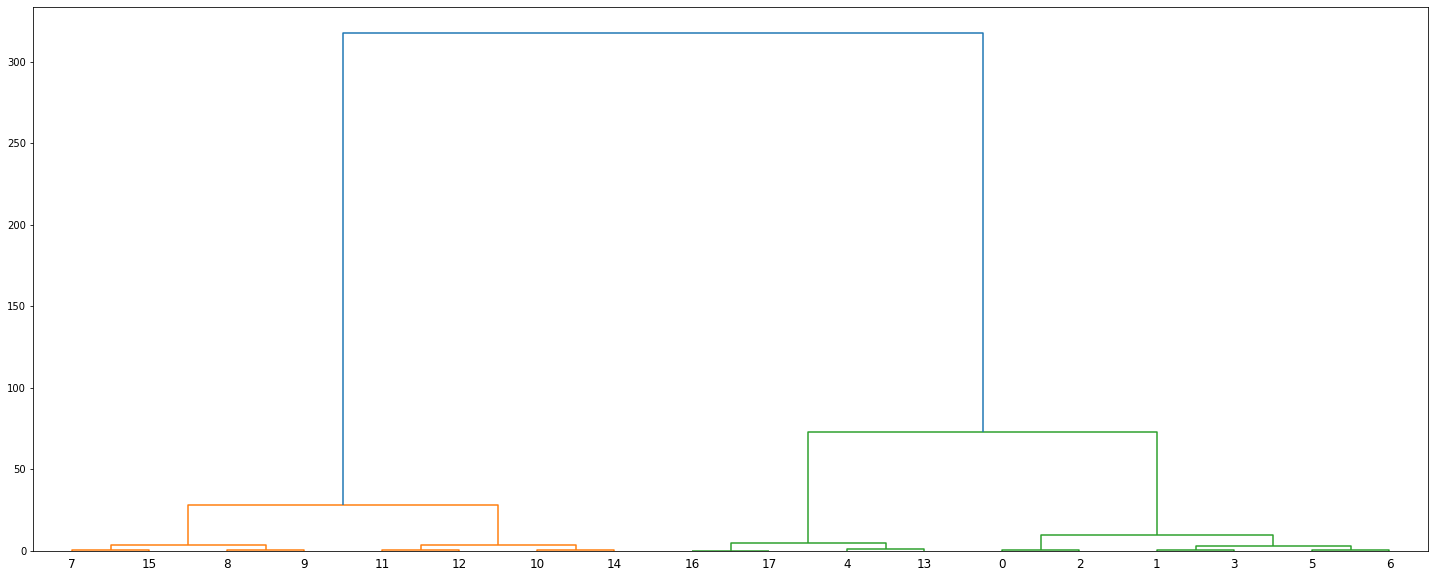

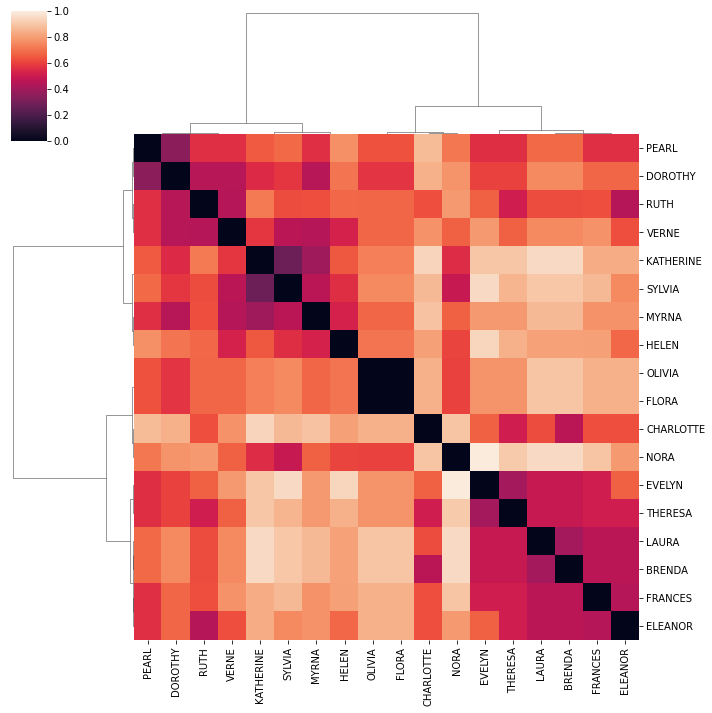

In [37]:
from scipy.cluster.hierarchy import dendrogram
from utils.clustering import agglomerative_clustering

z_pld_g, pol_pld_g = agglomerative_clustering(d, method='poldist'
                                      ,alpha=1, K=None, verbose=1
                                     ,algorithm="generic")
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(z_pld_g)
plt.show()
sns.clustermap(df, row_linkage=z_pld_g, col_linkage=z_pld_g)
plt.show()

(17,)


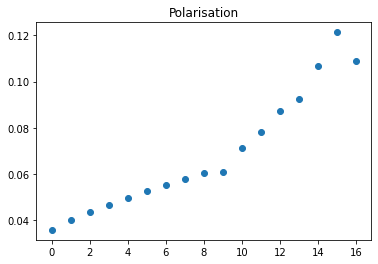

In [38]:
from matplotlib import pyplot as plt
print(pol_pld.shape)
plt.plot(pol_pld_g, "o")
plt.title("Polarisation")
plt.show()

Pretty much the same, and the linkage matrix is the same except for 2 steps with identical distance between the merged clusters:

In [39]:
np.isclose(z_pld, z_pld_g)

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [False, False,  True,  True],
       [False, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True, False,  True,  True],
       [ True, False,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

So both are valid solutions to the hierarchical clustering problem.

Looks ok! Our method also computes the global polarisation $P$ (or $pol$ above) at every step (except when there is only one cluster, because the polarisation of such a system is null). The formula is:

$$P = K  \sum_{i=1}^{n}  \sum_{j=1}^{n}  d^c_{i,j} \pi_i^{1+\alpha}\pi_j $$

where $\alpha \in (0,1.6]$, $\pi_i$ is the size of cluster $i$ and $d^c_{i, j}$ is the centroid distance between $i$ and $j$.

Note that the last distance given in the linkage matrix, $1188$, is the actual polarisation of the system (up to the normalisation constant $K$, which we took as $1$ here anyway) when only two clusters (32 and 33) are left. 

Note also that, as we might expect, polarisation seems to increase more or less monotonically when clustering by polarisation distance. Remarkably though, the most polarised state is not the last one (with only 2 clusters) but the previous one (with 3): this makes sense when looking at the (polarisation) distance shown in the dendogram. When considering the network of events instead of that of women, the last state, with 2 clusters, was indeed the one with greater polarisation.


Another thing we can look at is the evolution of the polarisation throughout the clustering for different $\alpha$:

Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...


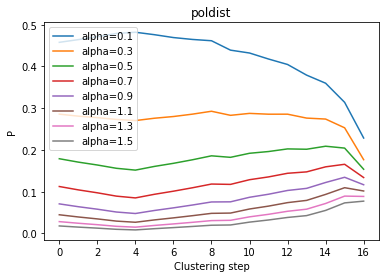

Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...


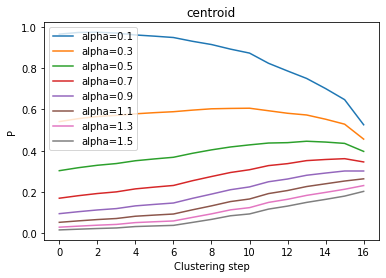

Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...


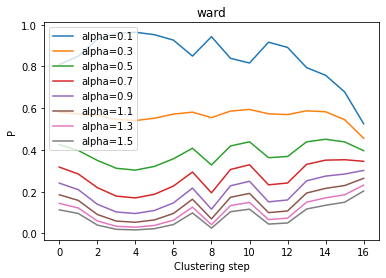

In [51]:
alphas = np.arange(0.1,1.7,0.2)

for method in ["poldist", "centroid", "ward"]:
    algo = "generic" if method == "centroid" else "nn_chain"
    for alpha in alphas:
        _, p = agglomerative_clustering(d, method=method
                                        , alpha=alpha, algorithm=algo)
        plt.plot(p, "-", label="alpha="+str(round(alpha,1)))
    plt.title(method)
    plt.xlabel("Clustering step")
    plt.ylabel("P")
    plt.legend()
    plt.savefig("../plots/SouthernWomen_" + method + "_polarisation.png")
    plt.show()

## 3. Dendogram/tree topologic distances for different $\alpha$

Let's check the tree distance between our Ward, poldist and centroid-obtained dendograms. I use the library *dendropy*.

In [45]:
#!pip install dendropy

Function to produce dendogram/tree string in Newick format from a linkage matrix:

In [47]:
import dendropy

def z_to_tree_str_newick(z):
    tree_str = ""
    clusters = women
    idx2woman = {i:wi for i, wi in enumerate(women)}
    woman2idx = {wi:i for i, wi in enumerate(women)}
    n = z.shape[0] + 1
    for i in range(n-1):
        #print(z[i, :2])
        new_clus = "(" + idx2woman[int(z[i,0])] + "," + idx2woman[int(z[i,1])] + ")"
        idx2woman[int(i+n)] = new_clus
        #print(int(i+z.shape[0]))
    idx2woman[int(i+n)] += ";"
    return idx2woman[int(2*n-2)]

tree_str1 = z_to_tree_str_newick(z_ctr)
tree_str2 = z_to_tree_str_newick(z_pld)

print(f"{tree_str1}\n{tree_str2}")

((CHARLOTTE,(ELEANOR,(FRANCES,((LAURA,BRENDA),(EVELYN,THERESA))))),((OLIVIA,FLORA),(NORA,(HELEN,(RUTH,((PEARL,DOROTHY),(VERNE,(MYRNA,(KATHERINE,SYLVIA)))))))));
((((PEARL,DOROTHY),(RUTH,VERNE)),((KATHERINE,SYLVIA),(MYRNA,HELEN))),(((OLIVIA,FLORA),(CHARLOTTE,NORA)),((EVELYN,THERESA),((LAURA,BRENDA),(FRANCES,ELEANOR)))));


Function to compute the unweighted Robinson-Foulds distance between two trees given their strings in Newick format:

In [48]:
import dendropy
from dendropy.calculate import treecompare
def RF_dist(tree_str1, tree_str2):
    # trees need to have the same TaxonNamespace for RF distance
    tns = dendropy.TaxonNamespace()
    tree1 = dendropy.Tree.get_from_string(tree_str1, "newick",
            taxon_namespace=tns)
    tree2 = dendropy.Tree.get_from_string(tree_str2, "newick",
            taxon_namespace=tns)
    #have to compute bipàrtitions (whatever it means) of both trees 
    #before calling symmetric_difference
    tree1.encode_bipartitions()
    tree2.encode_bipartitions()
    #return unweighted RF distance
    return treecompare.symmetric_difference(tree1, tree2)

Produce and save plot of RF distances vs $\alpha$:

In [49]:
from scipy.cluster.hierarchy import dendrogram
from utils.clustering import agglomerative_clustering

dist_p2c = []
dist_p2w = []
dist_p2p0 = []
#alphas = np.arange(0,50,1)
alphas = np.arange(0,20,1)

z_pld0, p_pld0 = agglomerative_clustering(d, method='poldist'
                                          , alpha=0, algorithm="nn_chain")
tp0_str = z_to_tree_str_newick(z_pld0)

for alpha in alphas:
    z_pld, p_pld = agglomerative_clustering(d, method='poldist'
                                          , alpha=alpha, algorithm="nn_chain")
    z_ctr, p_ctr = agglomerative_clustering(d, method='centroid'
                                        ,alpha=1, algorithm="generic")
    z_wrd, p_wrd = agglomerative_clustering(d, method='ward', algorithm="nn_chain")

    tp_str = z_to_tree_str_newick(z_pld)
    tc_str = z_to_tree_str_newick(z_ctr)
    tw_str = z_to_tree_str_newick(z_wrd)
    
    dist_p2c.append(RF_dist(tp_str, tc_str))
    dist_p2w.append(RF_dist(tp_str, tw_str))
    dist_p2p0.append(RF_dist(tp0_str, tp_str))

Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16/16...
Iteration 16

In [37]:
#dist_p2p0, dist_p2c, dist_p2w

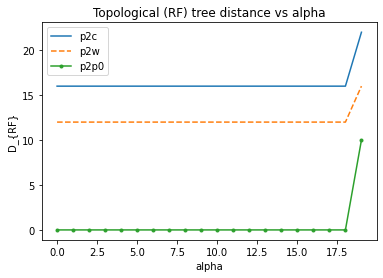

In [50]:
from matplotlib import pyplot as plt

plt.plot(alphas, dist_p2c, "-", label="p2c")
plt.plot(alphas, dist_p2w, "--", label="p2w")
plt.plot(alphas, dist_p2p0, ".-", label="p2p0")

plt.title("Topological (RF) tree distance vs alpha")
plt.xlabel("alpha")
plt.ylabel("D_{RF}")
plt.legend()
plt.savefig("../plots/SouthernWomen_rfdist_vs_alpha.png")
plt.show()

There are no topological changes in the dendogram produced with pol dist for the different alpha allowed: the distances between branches do change, but the structure is the same. 

Normalising $d^c$ does nothing coz its a proportionality constant in pol dist: the only thing that can make the allowed range of alpha relevant for the pol dist is a greater network size.